## **Data Source - Kaggle**

### **URL - https://www.kaggle.com/kazanova/sentiment140**
### **Details -** This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment . 



### **Downloaded the data from kaggle and stored in my Google Drive and now fetching it from there**

In [ ]:
!wget --no-check-certificate \
    https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a43387856556b744d6d30355655644f53693156626c424657584646576c5a584c577034626b685a5254563459555176646d6c6c64773d3d?dl=3 \
    -O /tmp/Twitter.csv

--2020-10-11 18:57:54--  https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a43387856556b744d6d30355655644f53693156626c424657584646576c5a584c577034626b685a5254563459555176646d6c6c64773d3d?dl=3
Resolving gigafilehost.com (gigafilehost.com)... 104.18.33.229, 104.18.32.229, 172.67.164.124, ...
Connecting to gigafilehost.com (gigafilehost.com)|104.18.33.229|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m79kufs356d24ts5pt5c0lk7jjghnbj2/1602442650000/05300042213365893851/*/1UI-2m9UGNJ-UnPEYqEZVW-jxnHYE5xaD?e=download [following]
--2020-10-11 18:57:56--  https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m79kufs356d24ts5pt5c0lk7jjghnbj2/1602442650000/05300042213365893851/*/1UI-2m9UGNJ-UnPEYqEZVW-jxnHYE5xaD?e=download
Resolving doc-0c-50-docs.googleuserconten

### **Let's load the file**

In [ ]:
# !pip install iconv
# iconv -f LATIN1 -t UTF8 Twitter.csv -o twitter.csv

import pandas as pd

df = pd.read_csv("/tmp/Twitter.csv", encoding = "ISO-8859-1", names = ["label", "IDs", "Timestamp", "Query", "User", "Sentence"])
df.head()

,label,IDs,Timestamp,Query,User,Sentence
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### **Checking the number of values with label**

In [ ]:
val_count = dict(df["label"].value_counts())
for i in val_count.items():
  print("For Label  --> ", i[0], "  numbers of sentences are  --> ", i[-1])

For Label  -->  4   numbers of sentences are  -->  800000
For Label  -->  0   numbers of sentences are  -->  800000


### **Let's shuffle the data and replace label "4" with "1" for easier understanding**

In [ ]:
df = df.sample(frac = 1)
corpus = df["Sentence"].values.tolist()
print("No. of sentences  --> ", len(corpus))
labels = df["label"].replace(4, 1).values.tolist()
print("\n")
print("First label and sentence is:\n", str(labels[0]) + "  --->  " + corpus[0])
print("Second label and sentence is:\n", str(labels[1]) + "  --->  " + corpus[1])

No. of sentences  -->  1600000


First label and sentence is:
 1  --->  @callummay well if you do have to work instead of being in the sunshine, at least you're doing something you enjoy 
Second label and sentence is:
 0  --->  @nessalh there aren't any dunkin donuts around here anymore 


## **Let's Pre-process the data**




In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import string

stop_words = (stopwords.words("english"))
print(stop_words)
print("Length of Stopwords : ", len(stop_words))
print("\n")
punct = list(string.punctuation)
print(punct)
print("Length of Punctuations : ", len(punct))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## **Pre-processing (Part 1)**

### Removing unwanted charecters, stopwords etc.

In [ ]:
df_tmp = df.copy().reset_index()
df_tmp["label"] = df_tmp["label"].replace(4, 1)

In [ ]:
import re
import csv

# stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

sentence2 = []
for line in df_tmp["Sentence"].values.tolist():
  sentence = line.lower()                                           # Lowering the Sentence
  # sentence = re.sub("@[\w]*", "", line)
  sentence = re.sub("@[^\s]+", "", sentence)                        # Removing words started with "@"
  sentence = sentence.replace("  ", " ")
  sentence = re.sub("#[^\s]+", "", sentence)                        # Removing words started with "#"
  sentence = sentence.replace("  ", " ")
  sentence = re.sub(r'http\S+', '', sentence)                       # Removing any links
  # sentence = re.sub(r'http|https|www', '', sentence)
  sentence = sentence.replace("  ", " ")
  sentence = re.sub(r"[^\w\s]", "", sentence)                       # Removing Punctuation
  # print(sentence)
  for stopword in stop_words:
    unwanted = " " + stopword + " "
    sentence = sentence.replace(unwanted, " ")                      # Removing Stowords (excluding subject)
    sentence = sentence.replace("  ", " ")
  sentence2.append(sentence)


df_tmp["Sentence"] = sentence2
df_tmp.head()


,index,label,IDs,Timestamp,Query,User,Sentence
0,1155177,1,1978987786,Sun May 31 01:11:23 PDT 2009,NO_QUERY,sookio,well work instead sunshine least youre someth...
1,317017,0,2002521385,Tue Jun 02 04:27:17 PDT 2009,NO_QUERY,IAmJavaMama,arent dunkin donuts around anymore
2,1154533,1,1978926050,Sun May 31 00:57:48 PDT 2009,NO_QUERY,PoyntlasLove,just read 135 pages book time get dressed brea...
3,1300782,1,2006987078,Tue Jun 02 11:58:48 PDT 2009,NO_QUERY,JulioBouvier,pool season started today yeeeah look im haha...
4,1550071,1,2183675508,Mon Jun 15 14:49:57 PDT 2009,NO_QUERY,burstingenergy,yepwas mocking ujust inspirationguess didnt t...


## **Let's Test the Pre-processed Data**

In [ ]:
print(" --------  Un_Processed Data  -------- \n")

print("First sentence is:\n", df["Sentence"].head().values.tolist()[0])
print("\nSecond sentence is:\n", df["Sentence"].head().values.tolist()[1])

print("\n\n --------  Processed Data  -------- \n")

print("First sentence is:\n", df_tmp["Sentence"].head().values.tolist()[0])
print("\nSecond sentence is:\n", df_tmp["Sentence"].head().values.tolist()[1])

 --------  Un_Processed Data  -------- 

First sentence is:
 @callummay well if you do have to work instead of being in the sunshine, at least you're doing something you enjoy 

Second sentence is:
 @nessalh there aren't any dunkin donuts around here anymore 


 --------  Processed Data  -------- 

First sentence is:
  well work instead sunshine least youre something enjoy 

Second sentence is:
  arent dunkin donuts around anymore 


## **Let's extract some features from Dataset**

### Here, using Pre-processed data for analysis

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib
import matplotlib.pyplot as plt


def flat_list(whole):
  splt = []
  for i in range(len(whole)):
    for j in whole[i]:
      splt.append(j)
  return splt


token_word = []
for line in df_tmp["Sentence"].values.tolist():
  tokenized_word = word_tokenize(line)
  token_word.append(tokenized_word)

new_list = flat_list(token_word)

fdist = FreqDist(new_list)
print("Top 20 mostly used words are :\n", fdist.most_common(20))


Top 20 mostly used words are :
 [('im', 177473), ('i', 90145), ('good', 89390), ('day', 82371), ('get', 81486), ('like', 77749), ('go', 72908), ('got', 69682), ('dont', 66921), ('today', 64608), ('going', 64088), ('love', 63448), ('work', 62761), ('cant', 62596), ('time', 56104), ('back', 55977), ('lol', 55166), ('u', 52780), ('one', 52189), ('know', 51197)]


### **I didn't remove the stopwords if these are there as subject of a sentence**

In [ ]:
def freq_plot(func):
  plt.figure(figsize = (15, 10))
# matplotlib.rcParams.update({"font.size" : 10})
  matplotlib.rc("xtick", labelsize = 20)
  matplotlib.rc("ytick", labelsize = 20)
  matplotlib.rc("axes", labelsize = 20)
  func.plot(20)
# fdist.plot(30, cumulative = True)
  plt.show()


def findAll(punct, col_name):
  y_tags = []
  for line in col_name.values.tolist():
    x = re.findall("{}[^\s]+".format(punct), line)
    y_tags.append(x)
  new_tag = flat_list(y_tags)
  return new_tag


def ListToStr(list_):
  str_val = ""
  for item in list_:
    str_val += item
  return str_val



### **Let's Visualize most frequent words**

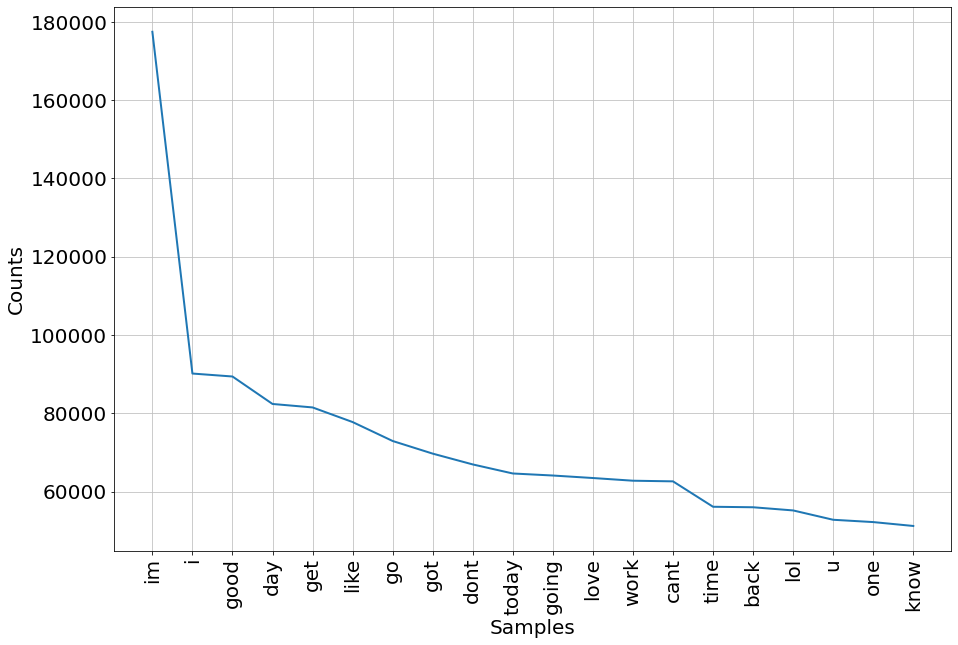

In [ ]:
freq_plot(fdist)

## **Check  hash-tagged(#) words**

### **Here, using Un-processed data to deep-dive**

Top 10 mostly hash-tagged words are :
 [('#followfriday', 1835), ('#fb', 1740), ('#squarespace', 823), ('#FF', 498), ('#seb-day', 498), ('#FollowFriday', 409), ('#1', 405), ('#musicmonday', 383), ('#iranelection', 339), ('#ff', 328)]




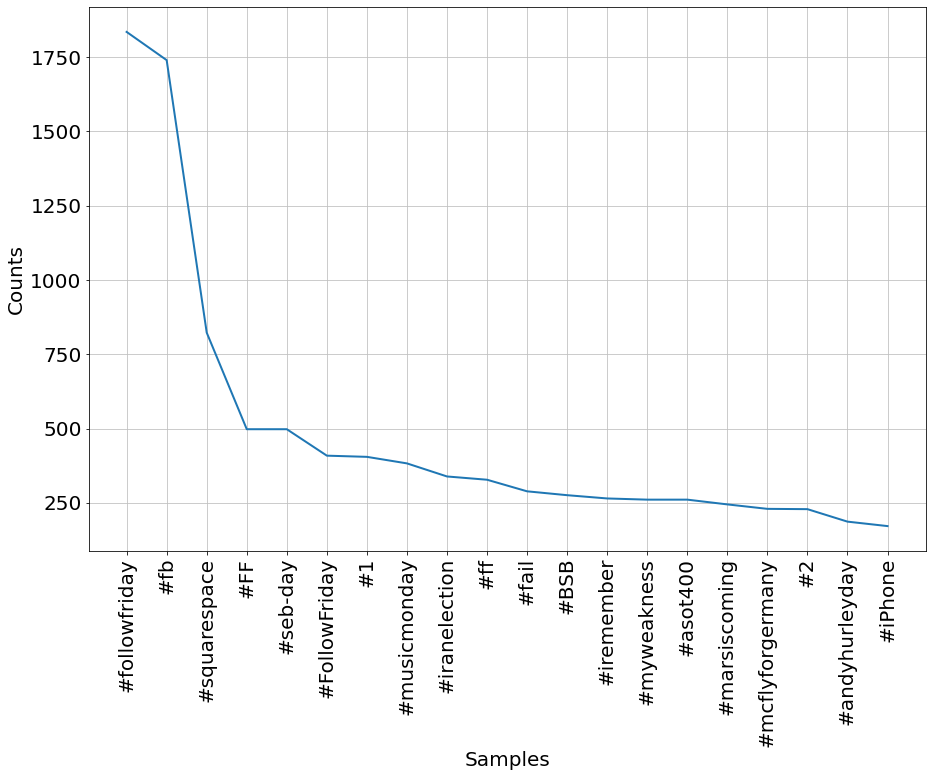

In [ ]:
fHash = FreqDist(findAll("#", df["Sentence"]))
print("Top 10 mostly hash-tagged words are :\n", fHash.most_common(10))
print("\n")

# Visualize
freq_plot(fHash)

## **Visualizing Hash-tagged using Worldcloud**

### **Downloading necessary files from my GDrive**

In [ ]:
# https://drive.google.com/file/d/1PghbwBDFwONIQ1DX8Mc5N37cnh-deP75/view?usp=sharing

!wget --no-check-certificate \
    https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a433878576d6852546b3577516a5a4f4e324644575842304f554e325354647a58323874566a597853316f7a59584976646d6c6c64773d3d?dl=3 \
    -O /tmp/hash_pic.png

--2020-10-11 13:25:33--  https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a433878576d6852546b3577516a5a4f4e324644575842304f554e325354647a58323874566a597853316f7a59584976646d6c6c64773d3d?dl=3
Resolving gigafilehost.com (gigafilehost.com)... 104.18.32.229, 104.18.33.229, 172.67.164.124, ...
Connecting to gigafilehost.com (gigafilehost.com)|104.18.32.229|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0k-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/egtvfb0rp7hrlj99re7h928ljr2numgf/1602422700000/13676830700241462985/*/1ZhQNNpB6N7aCYpt9CvI7s_o-V61KZ3ar?e=download [following]
--2020-10-11 13:25:35--  https://doc-0k-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/egtvfb0rp7hrlj99re7h928ljr2numgf/1602422700000/13676830700241462985/*/1ZhQNNpB6N7aCYpt9CvI7s_o-V61KZ3ar?e=download
Resolving doc-0k-b0-docs.googleuserconten

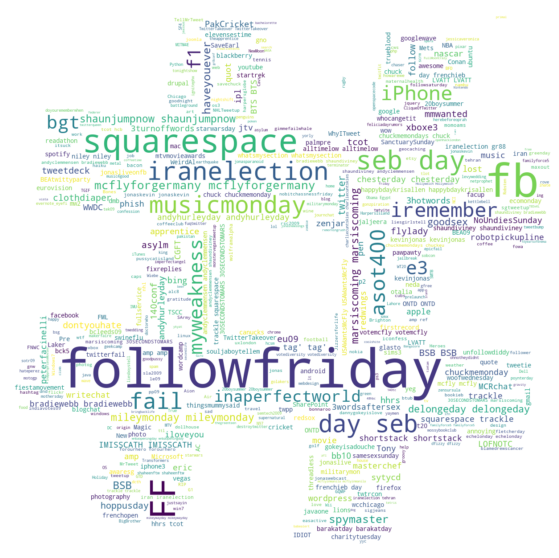

In [ ]:
import wordcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np

my_img = np.array(Image.open('/tmp/hash_pic.png'))

hash_wc = WordCloud(
    background_color='white',
    max_words=500,
    mask = my_img
)

hash_lists = findAll("#", df["Sentence"])
hash_str = ListToStr(hash_lists)

# generate the word cloud
hash_wc.generate(hash_str)
plt.figure(figsize = (15, 10))
plt.imshow(hash_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Check  most Mentioned(@) words**

Top 10 mostly mentioned words are :
 [('@mileycyrus', 4324), ('@tommcfly', 3841), ('@ddlovato', 3356), ('@Jonasbrothers', 1267), ('@DavidArchie', 1227), ('@jordanknight', 1108), ('@DonnieWahlberg', 1086), ('@JonathanRKnight', 1054), ('@mitchelmusso', 1040), ('@taylorswift13', 974)]




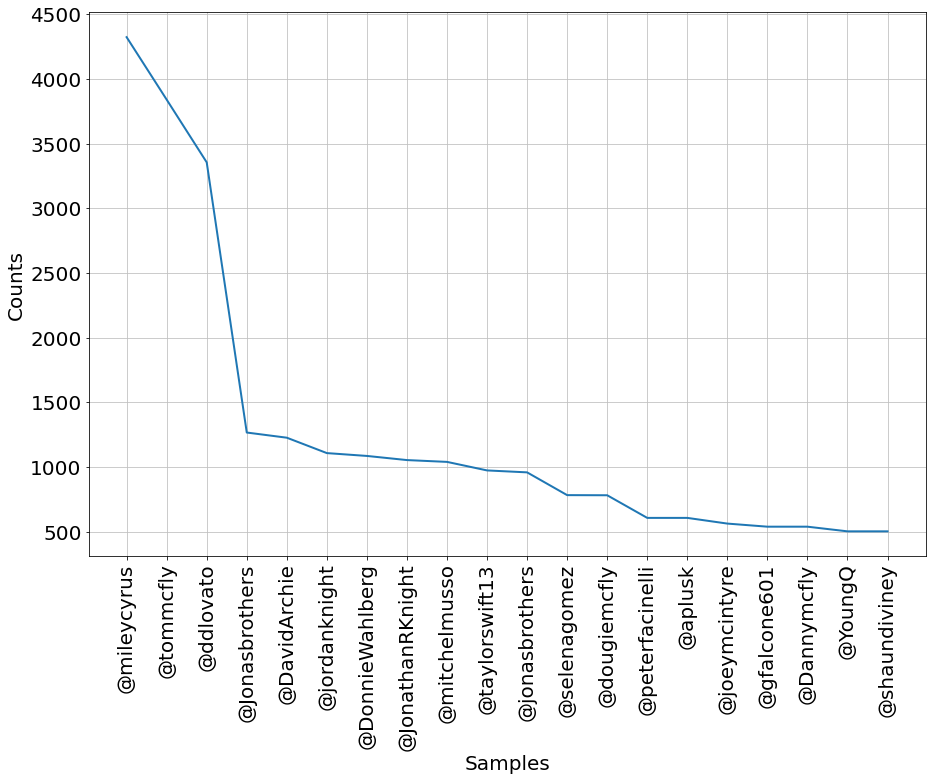

In [ ]:
fMentioned = FreqDist(findAll("@", df["Sentence"]))
print("Top 10 mostly mentioned words are :\n", fMentioned.most_common(10))
print("\n")

# Visualize
freq_plot(fMentioned)

## **Visualizing Hash-tagged using Worldcloud**

### Downloading necessary files from my GDrive

In [ ]:
!wget --no-check-certificate \
    https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a433878517a526a4d4656435a30646f5a3152354f556c665657744b56444630517a4d315532643054475a45547a6b76646d6c6c64773d3d?dl=3 \
    -O /tmp/At_pic.png

--2020-10-11 13:25:53--  https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a433878517a526a4d4656435a30646f5a3152354f556c665657744b56444630517a4d315532643054475a45547a6b76646d6c6c64773d3d?dl=3
Resolving gigafilehost.com (gigafilehost.com)... 172.67.164.124, 104.18.32.229, 104.18.33.229, ...
Connecting to gigafilehost.com (gigafilehost.com)|172.67.164.124|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-04-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hha8tkm116vemlh6ihejvpp8khifmhoj/1602422700000/13676830700241462985/*/1C4c0UBgGhgTy9I_UkJT1tC35SgtLfDO9?e=download [following]
--2020-10-11 13:25:55--  https://doc-04-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hha8tkm116vemlh6ihejvpp8khifmhoj/1602422700000/13676830700241462985/*/1C4c0UBgGhgTy9I_UkJT1tC35SgtLfDO9?e=download
Resolving doc-04-b0-docs.googleuserconte

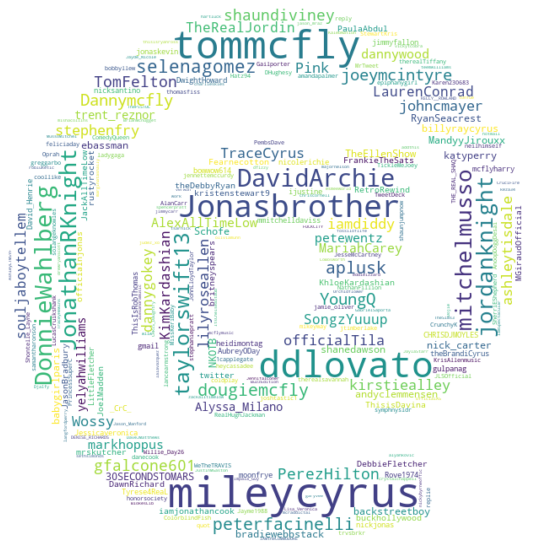

In [ ]:
my_img = np.array(Image.open('/tmp/At_pic.png'))

At_lists = findAll("@", df["Sentence"])
At_str = ListToStr(At_lists)

At_wc = WordCloud(
    background_color='white',
    max_words=500,
    mask = my_img
)

At_wc.generate(At_str)
plt.figure(figsize = (15, 10))
plt.imshow(At_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Most frequent Bi-grams**

### Here, not using Worldcloud

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: generator 'ngrams' raised StopIteration
  


Top 10 mostly used bi-gram words are :
 [('gon na', 23505), ('wan na', 16452), ('cant wait', 13199), ('last night', 11815), ('im going', 10524), ('good morning', 9804), ('got ta', 8934), ('dont know', 8255), ('wish could', 6528), ('feel like', 6516)]




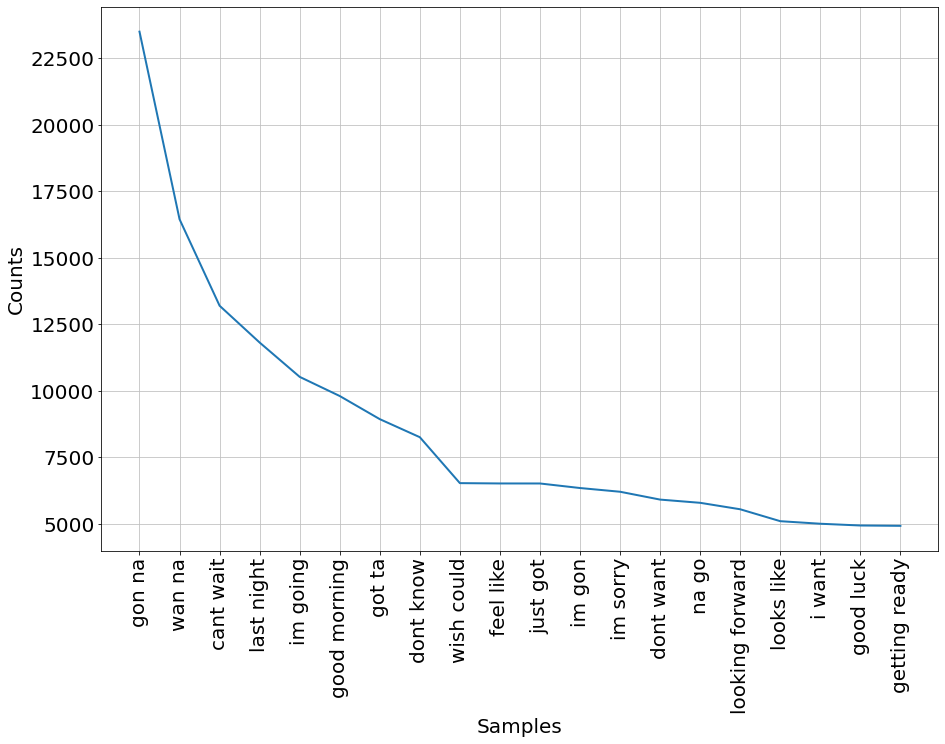

In [ ]:
from nltk.util import ngrams

bigram_list = []
for line in df_tmp["Sentence"].values.tolist():
  bi_gram = ngrams(nltk.word_tokenize(line), 2)
  bi_list = list(bi_gram)
  bi_str = [" ".join(i) for i in bi_list]
  bigram_list.append(bi_str)

# print(bigram_list)
# print(flat_list(bigram_list))
lists_of_bigrams = flat_list(bigram_list)

most_bi = FreqDist(lists_of_bigrams)
print("Top 10 mostly used bi-gram words are :\n", most_bi.most_common(10))

print("\n")

# Visualize
freq_plot(most_bi)

### **Let's build a function for ngrams depending on requirement**

In [ ]:
def ngram(x_gram, col_name):

  x_gram_list = []
  for line in col_name.values.tolist():
    x_grams = ngrams(nltk.word_tokenize(line), x_gram)
    x_list = list(x_grams)
    x_str = [" ".join(i) for i in x_list]
    x_gram_list.append(x_str)

  return x_gram_list


### **Let's do the same for Tri-grams**

In [ ]:
#### Need to check

"""

trigrams = ngram(3, df_tmp["Sentence"])
lists_of_trigrams = flat_list(trigrams)
most_tri = FreqDist(lists_of_trigrams)
print("Top 10 mostly used tri-gram words are :\n", most_tri.most_common(10))

print("\n")

# Visualize
freq_plot(most_tri)

"""

'\n\ntrigrams = ngram(3, df_tmp["Sentence"])\nlists_of_trigrams = flat_list(trigrams)\nmost_tri = FreqDist(lists_of_trigrams)\nprint("Top 10 mostly used tri-gram words are :\n", most_tri.most_common(10))\n\nprint("\n")\n\n# Visualize\nfreq_plot(most_tri)\n\n'

## **Let's check mostly used data for Positive and Negative Sentiment**

In [ ]:
df_tmp2 = df_tmp.copy()

df_pos = df_tmp2[df_tmp2["label"]==1]
df_neg = df_tmp2[df_tmp2["label"]==0]

pos_sent = []
for line in df_pos["Sentence"].values.tolist():
  tokenized_word = word_tokenize(line)
  pos_sent.append(tokenized_word)
  
neg_sent = []
for line in df_neg["Sentence"].values.tolist():
  tokenized_word = word_tokenize(line)
  neg_sent.append(tokenized_word)
  
neg_sent2 = flat_list(neg_sent)
pos_sent2 = flat_list(pos_sent)

fpos = FreqDist(pos_sent2)
print("Top 10 mostly used words in Positive Sentiment are :\n", fpos.most_common(10))

fneg = FreqDist(neg_sent2)
print("Top 10 mostly used words in Negetive Sentiment are :\n", fneg.most_common(10))


Top 10 mostly used words in Positive Sentiment are :
 [('im', 74852), ('good', 60840), ('love', 46829), ('day', 44368), ('like', 37109), ('get', 36170), ('thanks', 33727), ('lol', 33479), ('got', 31593), ('going', 30647)]
Top 10 mostly used words in Negetive Sentiment are :
 [('im', 102621), ('i', 64369), ('get', 45316), ('go', 45125), ('dont', 44912), ('work', 44000), ('cant', 43591), ('like', 40640), ('got', 38089), ('day', 38003)]


### **From above looks like some words need to be removed**

In [ ]:

!wget --no-check-certificate \
    https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a4338785a565645546e64475232683652325a586355705262586c35625774566448564b647a5a4d61314a31556e4576646d6c6c64773d3d?dl=3 \
    -O /tmp/Tweeter_logo.png



--2020-10-11 18:35:04--  https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a4338785a565645546e64475232683652325a586355705262586c35625774566448564b647a5a4d61314a31556e4576646d6c6c64773d3d?dl=3
Resolving gigafilehost.com (gigafilehost.com)... 104.18.32.229, 172.67.164.124, 104.18.33.229, ...
Connecting to gigafilehost.com (gigafilehost.com)|104.18.32.229|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pkiph9618d7et0cej5s3q89v3ug5lhnl/1602441300000/13676830700241462985/*/1eUDNwFGhzGfWqJQmyymkUtuJw6LkRuRq?e=download [following]
--2020-10-11 18:35:06--  https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pkiph9618d7et0cej5s3q89v3ug5lhnl/1602441300000/13676830700241462985/*/1eUDNwFGhzGfWqJQmyymkUtuJw6LkRuRq?e=download
Resolving doc-10-b0-docs.googleuserconten

## **Let's visualize**

In [ ]:
# Taking a lot of time. So, commenting out

"""

logo = np.array(Image.open('/tmp/Tweeter_logo.png'))

pos_str = ListToStr(pos_sent2)
neg_str = ListToStr(neg_sent2)

# generate the word cloud for Positive Sentiment


pos_wordcloud = WordCloud( 
      background_color='white',
      max_words=500,
      mask=logo,
      colormap="Greens",
      )

pos_wordcloud.generate(pos_str)



neg_wordcloud = WordCloud( 
      background_color='white',
      max_words=500,
      mask=logo,
      colormap="Reds",
      )

neg_wordcloud.generate(neg_str)


fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=[15, 10])
ax1.imshow(pos_wordcloud)
ax1.axis('off')
ax1.set_title('Positive Sentiment', fontsize = 30)

ax2.imshow(neg_wordcloud)
ax2.axis('off')
ax2.set_title('Negative Sentiment', fontsize = 30)

"""

In [ ]:
"""

logo = np.array(Image.open('/tmp/Tweeter_logo.png'))

pos_str = ListToStr(pos_sent2)

pos_wordcloud = WordCloud( 
      background_color='white',
      max_words=500,
      mask=logo,
      colormap="Greens",
      )

pos_wordcloud.generate(pos_str)

plt.figure(figsize = (15, 10))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

"""

## **Pre-processing (Part 2)**

### Prepare data to use for Train-eligible (by Tokenizing, padding etc.)

### Here, used 100 dimension version of GloVe from Stanford
### Check below URL for more info:
https://nlp.stanford.edu/projects/glove/

### **Already downloaded and saved glove.6B.100d version in my G-drive and loading it from there**

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# from IPython.display import display
# from IPython.html import widgets 


trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .9
# num_epochs = 50
embedding_dim = 100
max_length = 32


corpus = df_tmp["Sentence"].values.tolist()
labels = df_tmp["label"].values.tolist()


# Tokenizing Sentences
token = Tokenizer()
token.fit_on_texts(corpus)
word_idx = token.word_index
sequences = token.texts_to_sequences(corpus)
padded_val = pad_sequences(sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

vocab_size = len(word_idx)
print("vocabulary size is ---> ", vocab_size)

# No Need to to tokenize labels as labels are numerical


training_size = int(len(labels) * training_portion)

training_padded = padded_val[0:training_size]
testing_padded = padded_val[training_size:]
training_label = labels[0:training_size]
testing_label = labels[training_size:]



# Note this is the 100 dimension version of GloVe from Stanford



!wget --no-check-certificate \
    https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a4338784f555a75513046434f4639726330395256574d35525463314d454e72525856755832527a6357564754446376646d6c6c64773d3d?dl=3 \
    -O /tmp/glove.6B.100d.txt


embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_idx.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

print("Length of embedding matrix: ", len(embeddings_matrix))




vocabulary size is --->  443547
--2020-10-11 13:30:22--  https://gigafilehost.com/file/6148523063484d364c79396b636d6c325a53356e6232396e62475575593239744c325a70624755765a4338784f555a75513046434f4639726330395256574d35525463314d454e72525856755832527a6357564754446376646d6c6c64773d3d?dl=3
Resolving gigafilehost.com (gigafilehost.com)... 172.67.164.124, 104.18.32.229, 104.18.33.229, ...
Connecting to gigafilehost.com (gigafilehost.com)|172.67.164.124|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lq5esvn4spgqvat1ohouf70q7gvm4juc/1602423000000/13676830700241462985/*/19FnCAB8_ksOQUc9E750CkEun_dsqeFL7?e=download [following]
--2020-10-11 13:30:24--  https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lq5esvn4spgqvat1ohouf70q7gvm4juc/1602423000000/13676830700241462985/*/19FnCAB8_ksOQUc9E750CkEun_dsqeFL7?e=download
Resolvin

In [ ]:
len(training_padded)

1440000

## **Let's build the Model**

### Here, running for only 5 epochs as it takes long time to train

In [ ]:
from tensorflow.keras import regularizers

train_padded = np.array(training_padded)
train_label = np.array(training_label)
test_padded = np.array(testing_padded)
test_label = np.array(testing_label)

epochs = 5

# model = tf.keras.Sequential([
#              tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
#              tf.keras.layers.Dropout(0.4),
#              tf.keras.layers.Conv1D(128, 5, activation='relu'),
#              tf.keras.layers.BatchNormalization(),
#              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
#              tf.keras.layers.Dropout(0.4),
#              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
#              tf.keras.layers.Dropout(0.2),
#              tf.keras.layers.GlobalAveragePooling1D(),
#              tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(0.01)),
#              tf.keras.layers.Dropout(0.4),
#              tf.keras.layers.Dense(1, activation = "sigmoid")                                   
# ])

model = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
             tf.keras.layers.Dropout(0.3),
             tf.keras.layers.Conv1D(128, 5, activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
             tf.keras.layers.GlobalAveragePooling1D(),
             tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(0.01)),
             tf.keras.layers.Dropout(0.3),
             tf.keras.layers.Dense(1, activation = "sigmoid")                                   
])


model.compile(optimizer = Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])
  
model.summary()


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose = 1, restore_best_weights=True)
  
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.2, patience=3, verbose = 1,
    min_delta=0.01)

history = model.fit(train_padded, train_label, epochs=5, validation_data=(test_padded, test_label), callbacks = [early_stop, reduce_lr], verbose = 1)

print("Training Done....!!!!")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 100)           44354800  
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 128)           64128     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 128)           512       
_________________________________________________________________
bidirectional_4 (Bidirection (None, 28, 300)           334800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 300)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 28, 40)           

<Figure size 432x288 with 0 Axes>

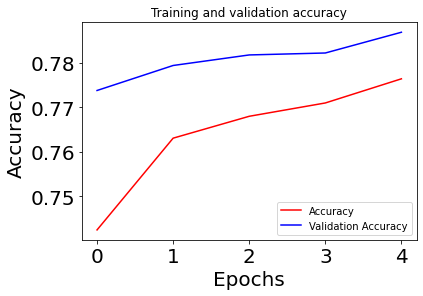

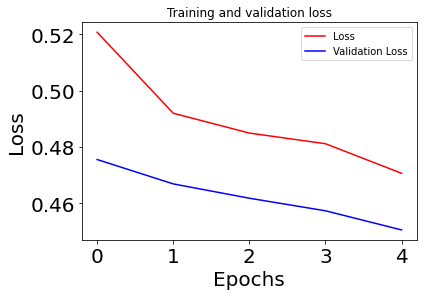

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

## **Let's create meta and vecs file for Tensorflow Projector**

In [ ]:
import io

reverse_word_index = dict([(value, key) for (key, value) in word_idx.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size+1, embedding_dim)

assert(weights.shape == (vocab_size+1, embedding_dim))

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(443548, 100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def predict(sentence, model, tokenizer, max_len, padding_typ, trunc_typ):
  my_sequence = token.texts_to_sequences([sentence])
  # print(my_sequence)
  my_padded = pad_sequences(my_sequence, maxlen = max_len, padding = padding_typ, truncating = trunc_typ)
  # print(my_padded)
  pred = model.predict(my_padded)
  # print(pred)
  if pred > 0.5:
    return ("Tone is Positive  ||  Probablity is ", pred)
  else:
    return ("Tone is Negetive  ||  Probablity is ", pred)



In [ ]:
your_word = str(input("Enter sentence of your choice:\n"))
tone, prob = predict(your_word , model, token, max_length, padding_type, trunc_type)
print("\n")
print(tone, prob[0][0])

Enter sentence of your choice:
He is not only good but also helpful


Tone is Negetive  ||  Probablity is  0.4811526


In [ ]:
your_word = str(input("Enter sentence of your choice:\n"))
tone, prob = predict(your_word , model, token, max_length, padding_type, trunc_type)
print("\n")
print(tone, prob[0][0])

Enter sentence of your choice:
He is great speaker


Tone is Positive  ||  Probablity is  0.9152126


In [ ]:
your_word = str(input("Enter sentence of your choice:\n"))
tone, prob = predict(your_word , model, token, max_length, padding_type, trunc_type)
print("\n")
print(tone, prob[0][0])

Enter sentence of your choice:
Don't angry me


Tone is Negetive  ||  Probablity is  0.040089726
